In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
import requests
from utils import TextAccessor
import uuid

In [2]:
datasets = Path().cwd().parent/"Datasets"/"Scrapper"

In [3]:
abc_recetas = (datasets/"barra").glob("*.csv")
df_barra = pd.concat([pd.read_csv(i) for i in abc_recetas])

In [4]:
df_barra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1208 non-null   object
 1   date         1208 non-null   object
 2   url          1208 non-null   object
 3   ingredients  1208 non-null   object
 4   steps        1208 non-null   object
dtypes: object(5)
memory usage: 47.3+ KB


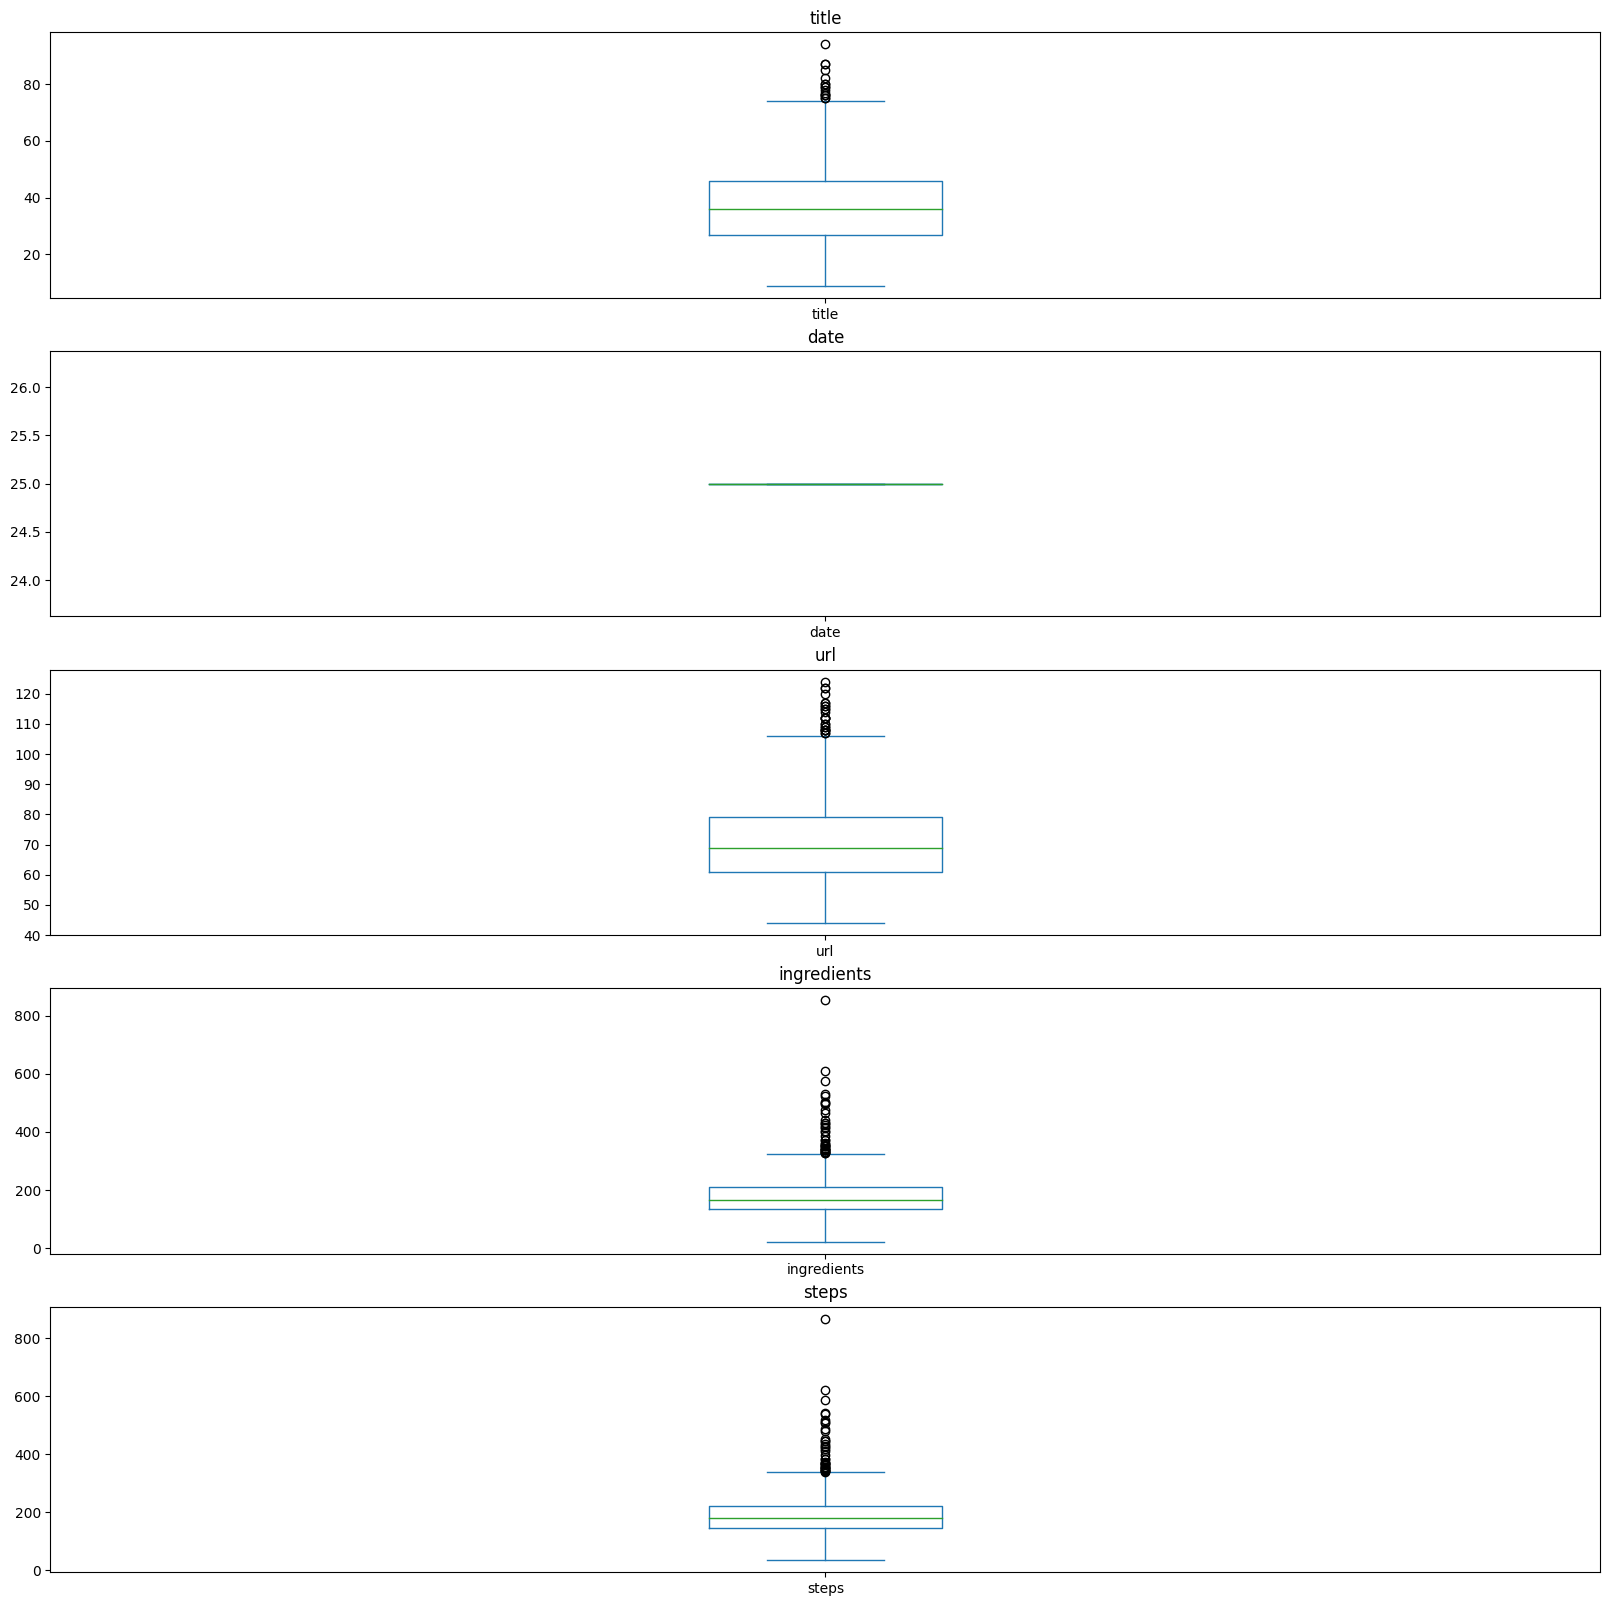

In [5]:
df_barra.utils_text.plot_boxplot()

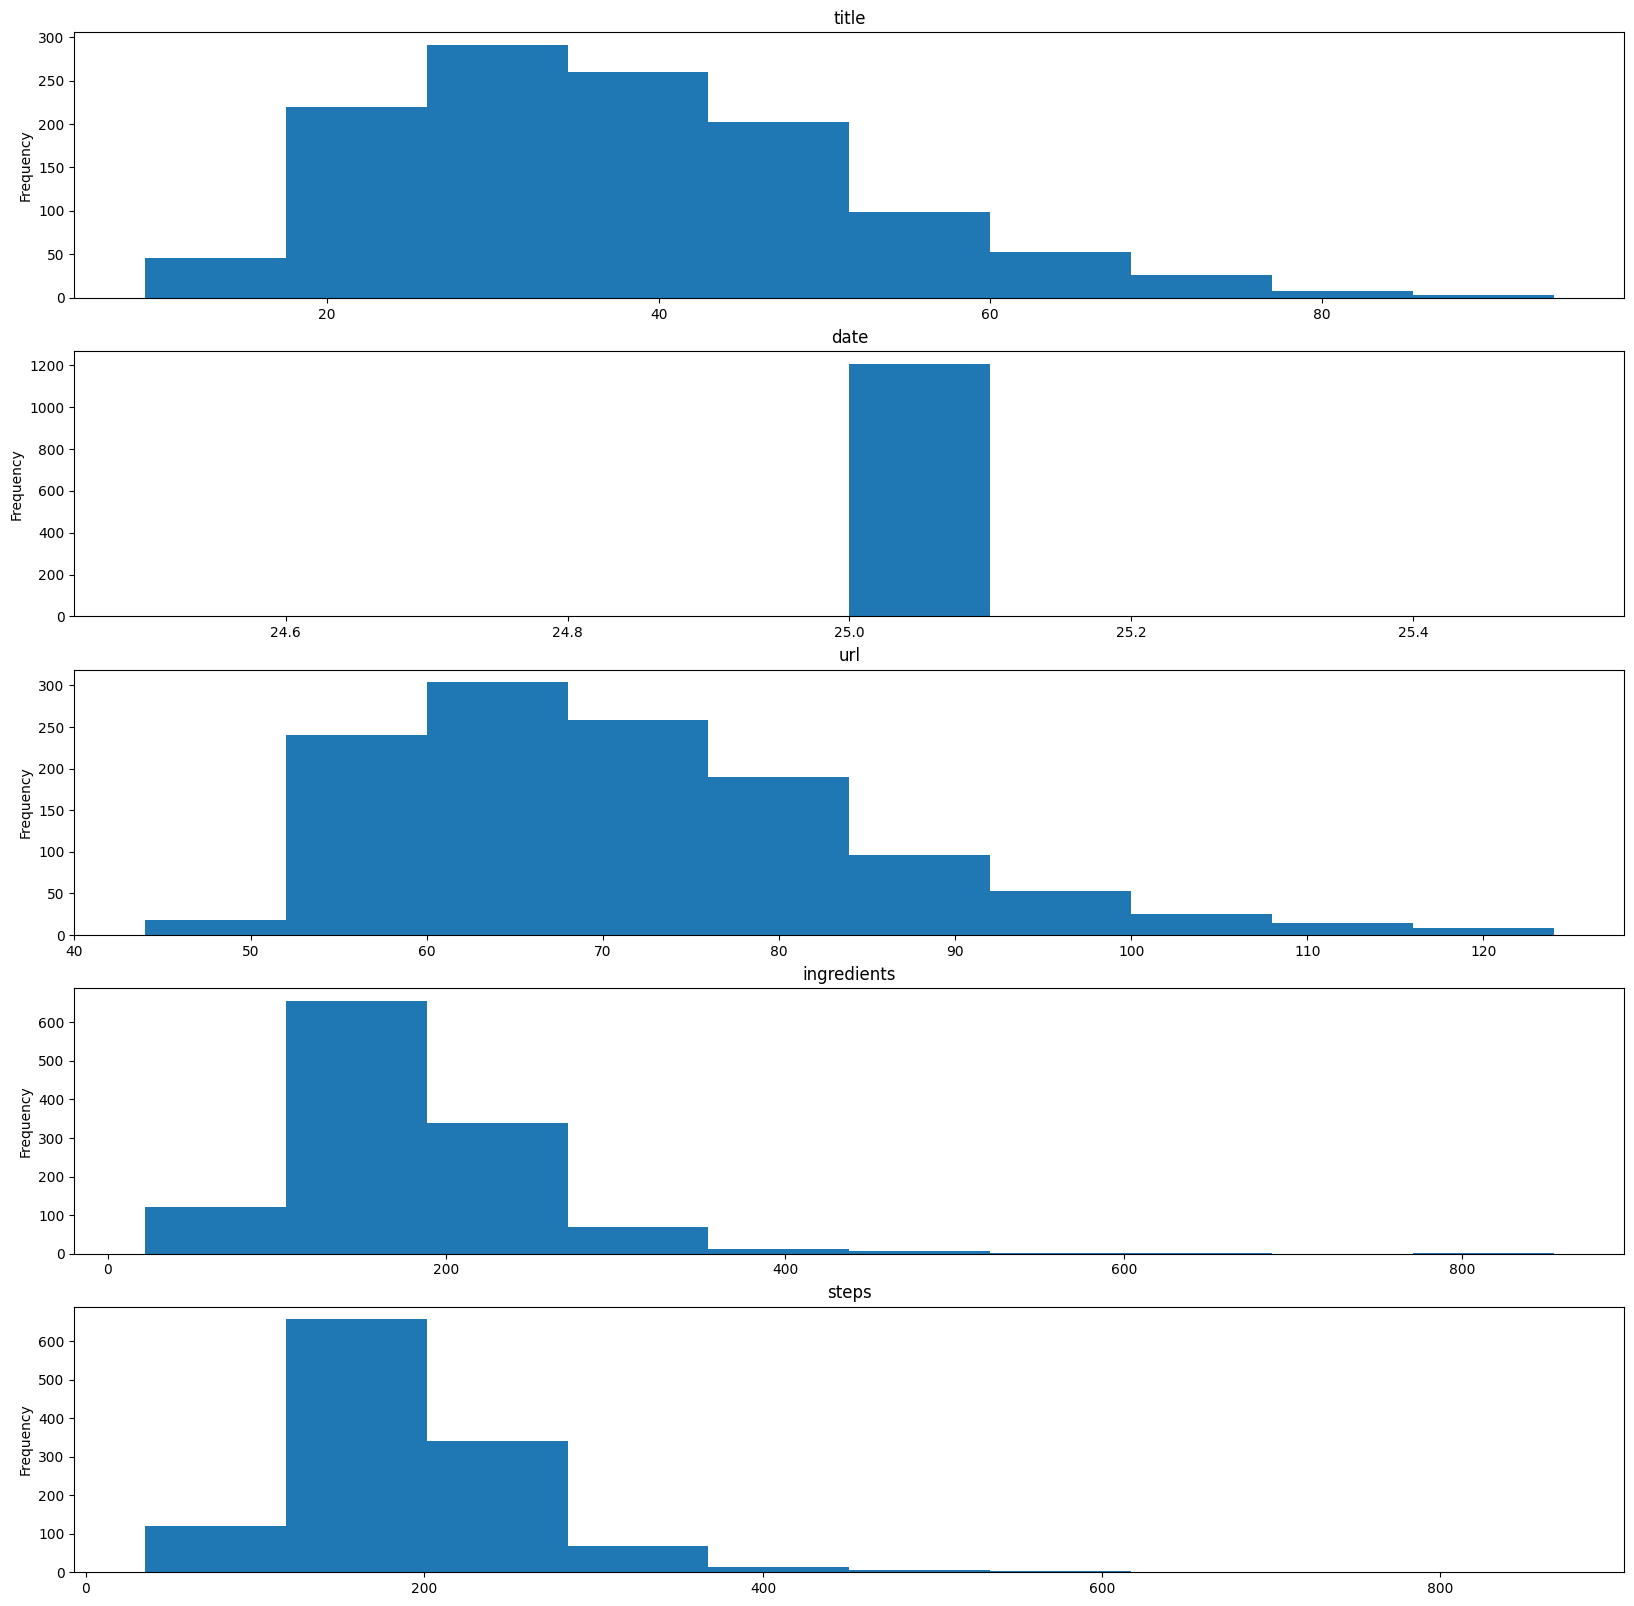

In [6]:
df_barra.utils_text.plot_length_text()

In [7]:
df_barra = df_barra[["url", "ingredients", "steps", "title"]]

In [8]:
df_barra.ingredients = df_barra.ingredients.str.replace("\n", " ").str.replace("\t", " ").str.replace("\r", " ")
df_barra.steps = df_barra.steps.str.replace("\n", " ").str.replace("\t", " ").str.replace("\r", " ")

C:\Users\froro\AppData\Local\Temp\ipykernel_28736\2741794595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barra.ingredients = df_barra.ingredients.str.replace("\n", " ").str.replace("\t", " ").str.replace("\r", " ")
C:\Users\froro\AppData\Local\Temp\ipykernel_28736\2741794595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barra.steps = df_barra.steps.str.replace("\n", " ").str.replace("\t", " ").str.replace("\r", " ")


In [9]:
df_barra["uuid"] = df_barra.apply(lambda x: uuid.uuid4(), axis=1)

In [10]:
df_barra.drop_duplicates(subset=["url"], inplace=True)
df_barra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1207
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          1208 non-null   object
 1   ingredients  1208 non-null   object
 2   steps        1208 non-null   object
 3   title        1208 non-null   object
 4   uuid         1208 non-null   object
dtypes: object(5)
memory usage: 56.6+ KB


In [11]:
df_barra["uuid"] = df_barra.apply(lambda x: uuid.uuid4(), axis=1)

In [12]:
paths_csv = (datasets/"okdiario").glob("*.csv")
df_okdiario = pd.concat([pd.read_csv(i) for i in paths_csv])

In [13]:
df_okdiario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14178 entries, 0 to 31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        14178 non-null  object
 1   date         14178 non-null  object
 2   url          14178 non-null  object
 3   ingredients  14022 non-null  object
 4   steps        14165 non-null  object
dtypes: object(5)
memory usage: 664.6+ KB


In [14]:
df_okdiario.dropna(inplace=True)

In [15]:
df_okdiario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14009 entries, 0 to 31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        14009 non-null  object
 1   date         14009 non-null  object
 2   url          14009 non-null  object
 3   ingredients  14009 non-null  object
 4   steps        14009 non-null  object
dtypes: object(5)
memory usage: 656.7+ KB


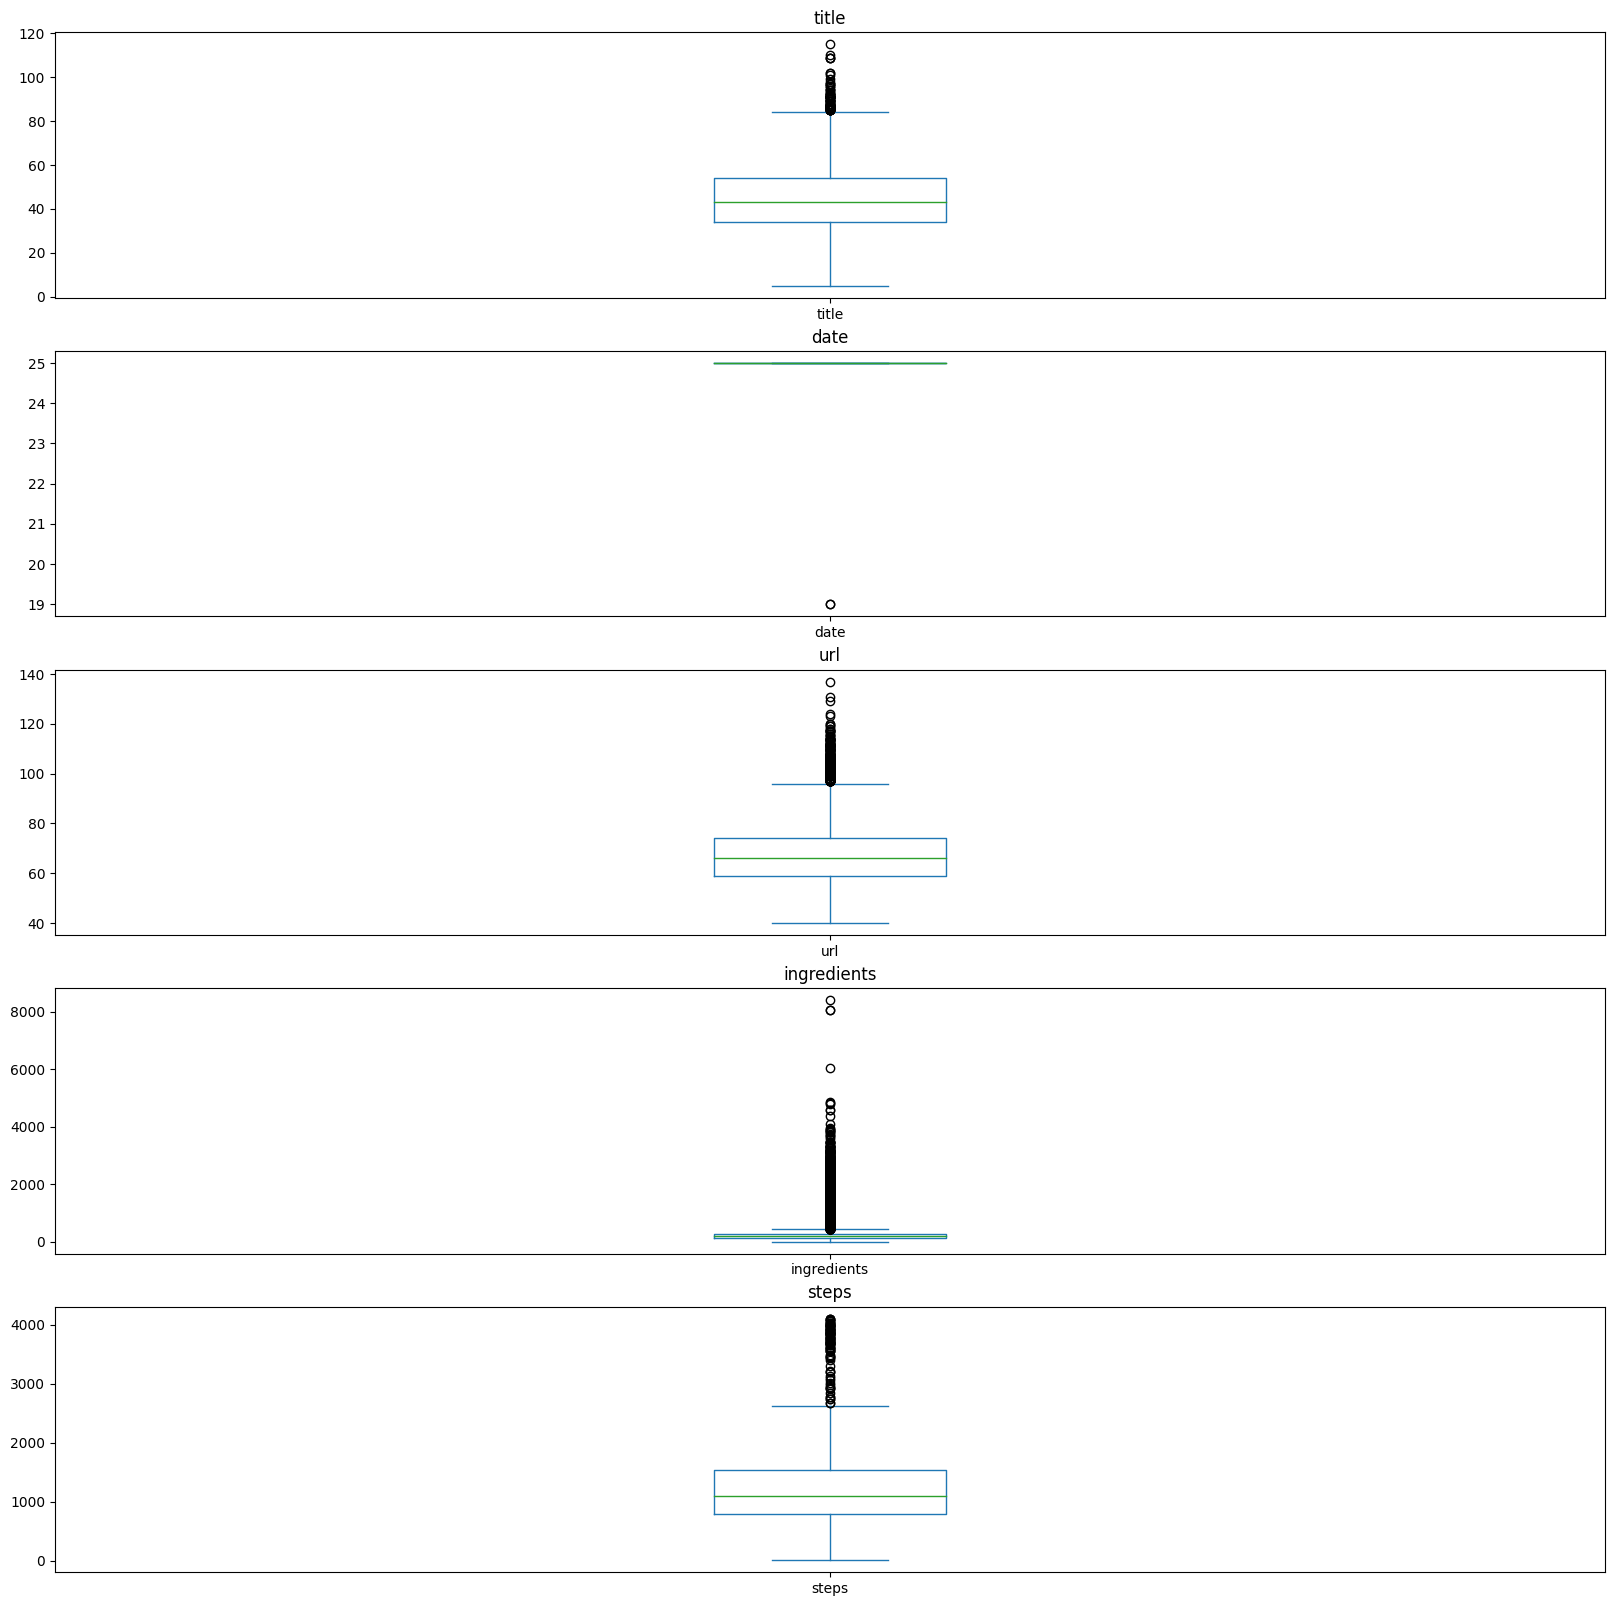

In [16]:
df_okdiario.utils_text.plot_boxplot()

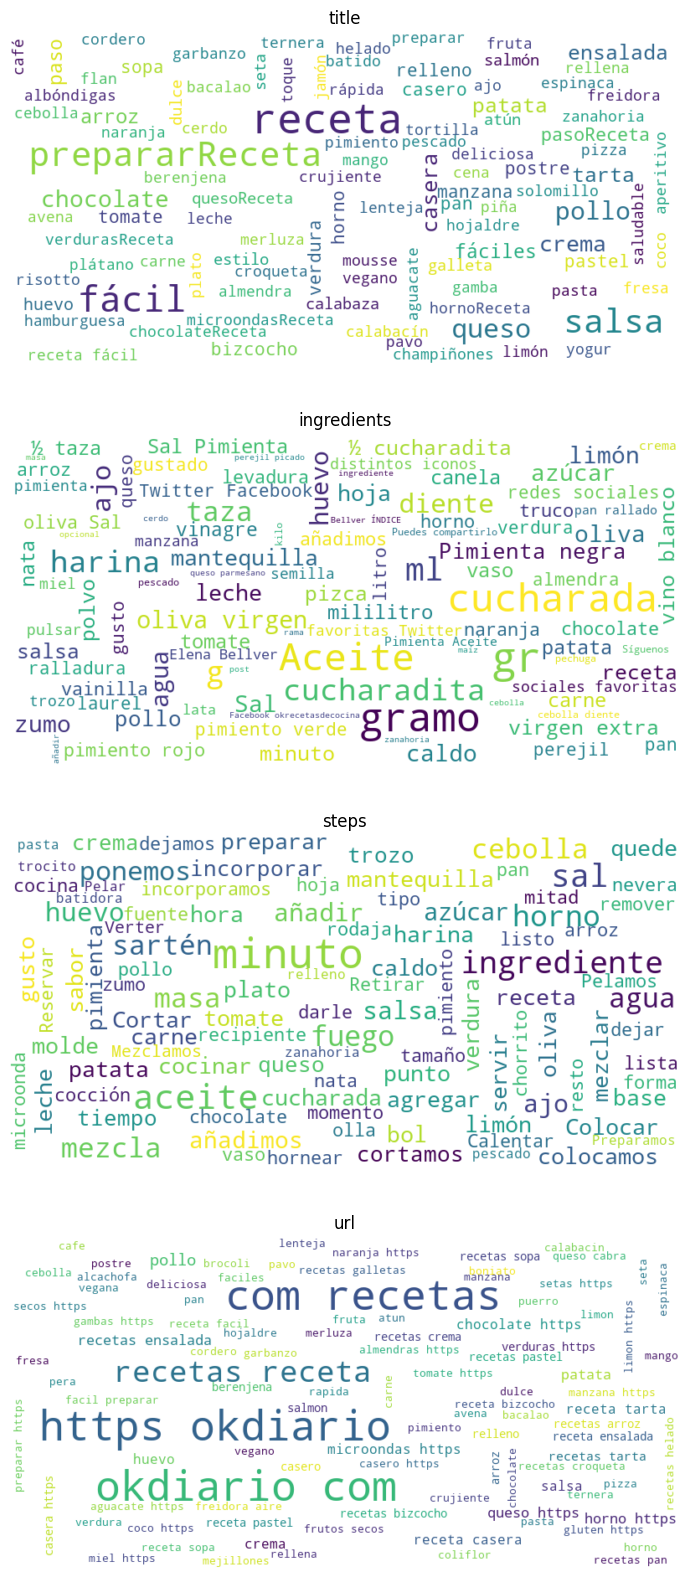

In [17]:
df_okdiario = df_okdiario[["title", "ingredients", "steps", "url"]]
df_okdiario.utils_text.plot_word_cloud()

In [18]:
df_okdiario.ingredients = df_okdiario.ingredients.replace("\n", " ").str.replace("\t", "")
df_okdiario.steps = df_okdiario.steps.replace("\n", " ").str.replace("\t", "")

C:\Users\froro\AppData\Local\Temp\ipykernel_28736\3353239002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_okdiario.ingredients = df_okdiario.ingredients.replace("\n", " ").str.replace("\t", "")
C:\Users\froro\AppData\Local\Temp\ipykernel_28736\3353239002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_okdiario.steps = df_okdiario.steps.replace("\n", " ").str.replace("\t", "")


In [19]:
df_okdiario["uidd"] = df_okdiario.apply(lambda x: uuid.uuid4(), axis=1)

In [20]:
df_okdiario.drop_duplicates(subset=["url"], inplace=True)
df_okdiario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14009 entries, 0 to 31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        14009 non-null  object
 1   ingredients  14009 non-null  object
 2   steps        14009 non-null  object
 3   url          14009 non-null  object
 4   uidd         14009 non-null  object
dtypes: object(5)
memory usage: 656.7+ KB


In [21]:
csv_thermorecetas = (datasets/"thermorecetas").glob("*.csv")
df_thermorecetas = pd.concat([pd.read_csv(i) for i in csv_thermorecetas])

In [22]:
df_thermorecetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4205 entries, 0 to 4204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        4205 non-null   object
 1   date         4205 non-null   object
 2   url          4205 non-null   object
 3   ingredients  4205 non-null   object
 4   steps        4205 non-null   object
dtypes: object(5)
memory usage: 164.4+ KB


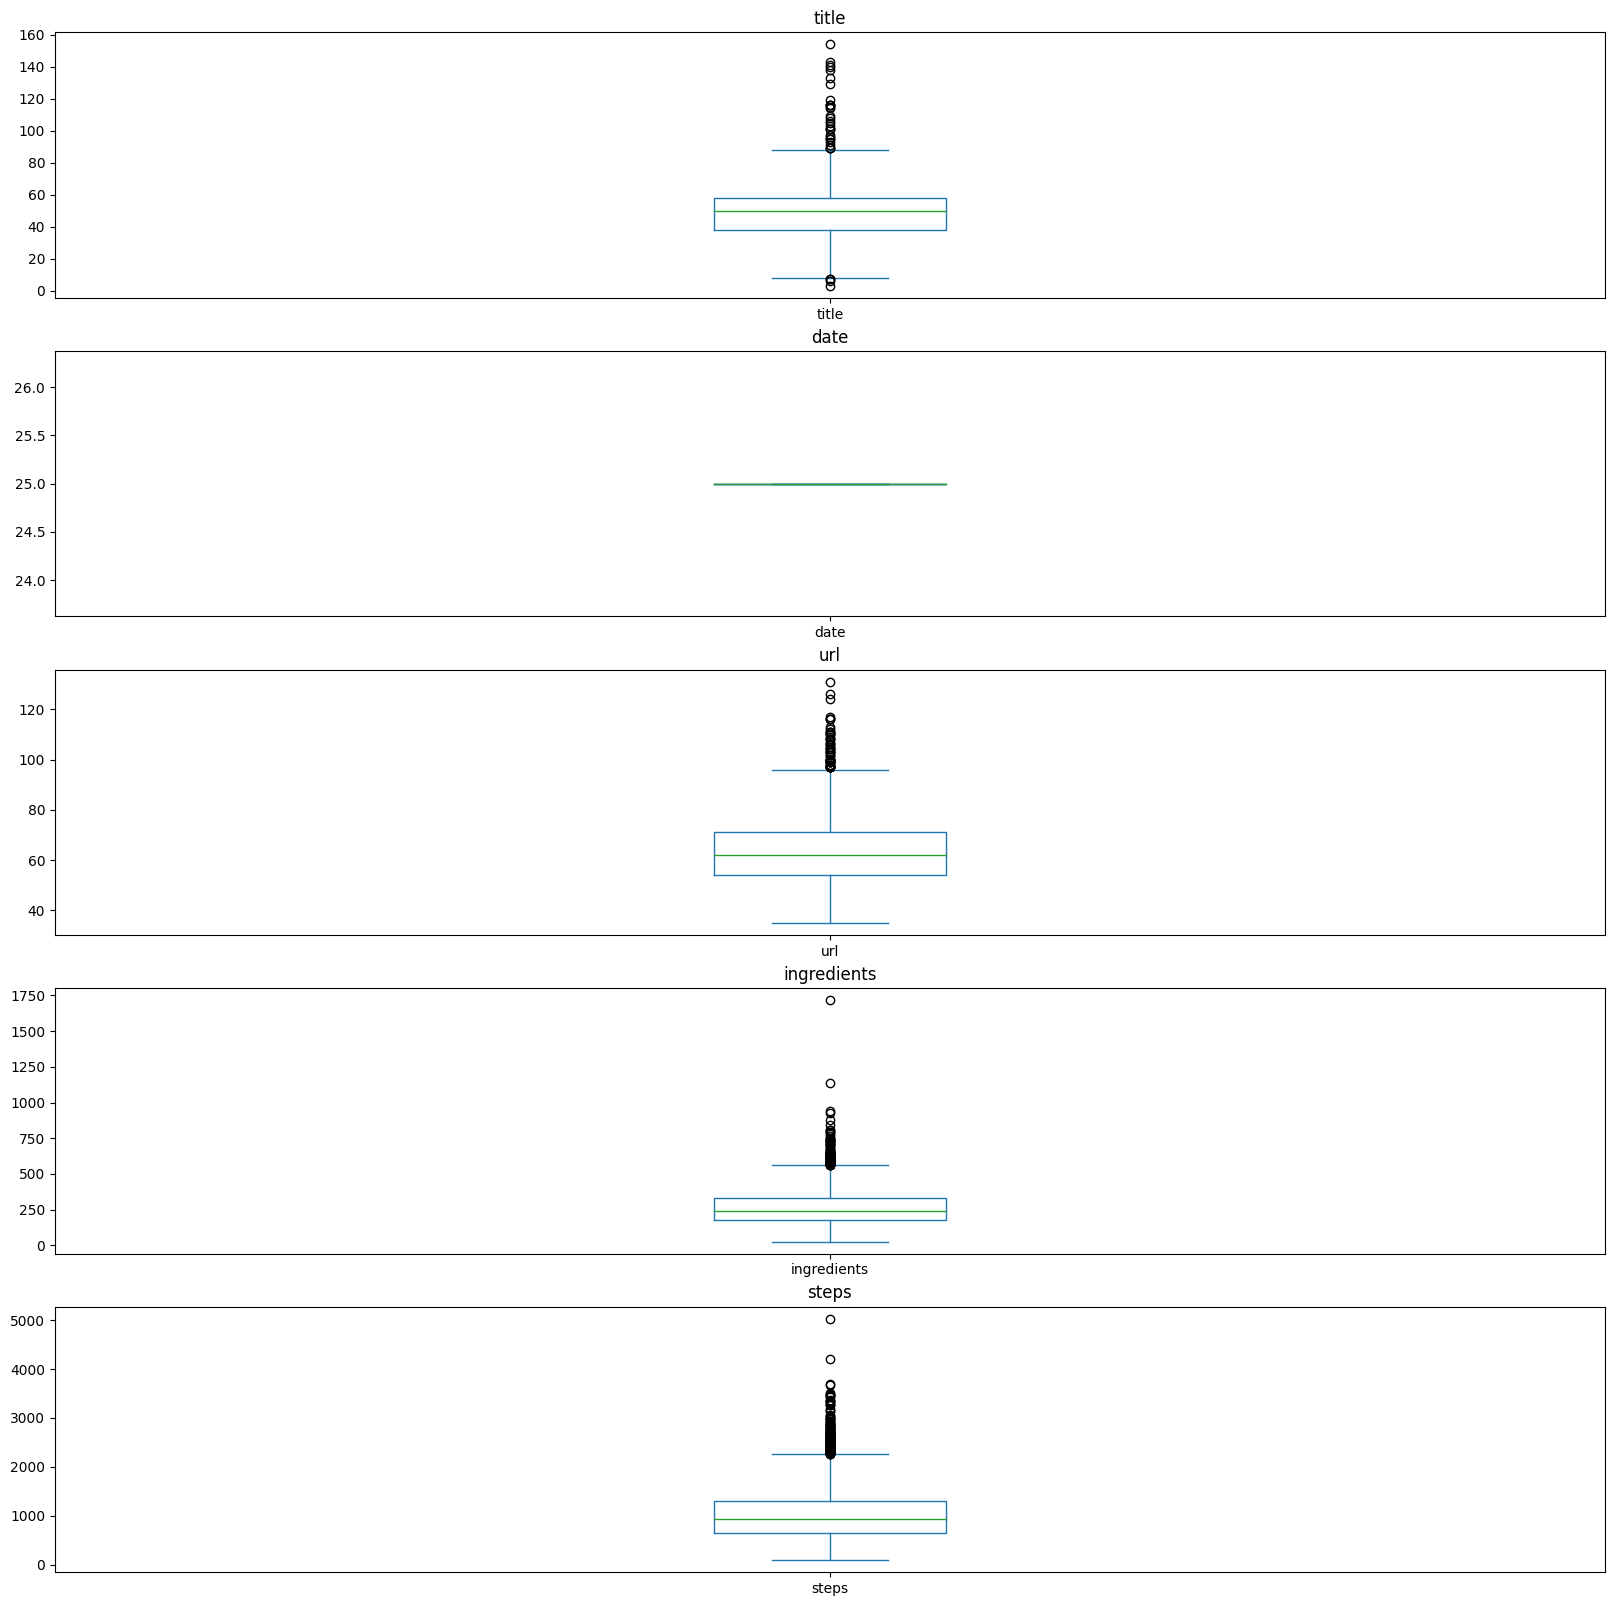

In [23]:
df_thermorecetas.utils_text.plot_boxplot()

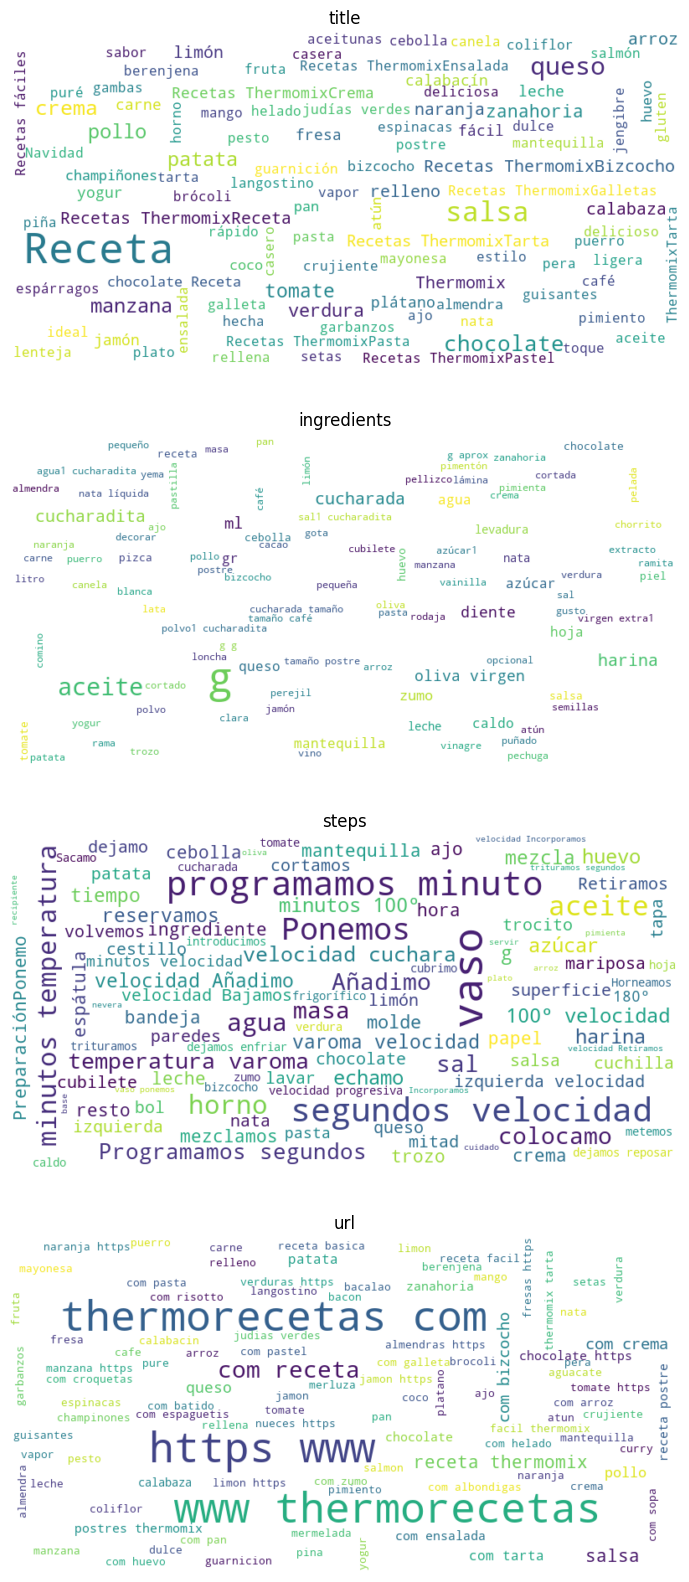

In [24]:
df_thermorecetas = df_thermorecetas[["title", "ingredients", "steps", "url"]]
df_thermorecetas.utils_text.plot_word_cloud()

In [25]:
df_thermorecetas.ingredients = df_thermorecetas.ingredients.replace("\n", " ").str.replace("\t", "")
df_thermorecetas.steps = df_thermorecetas.steps.replace("\n", " ").str.replace("\t", "")
df_thermorecetas["uuid"] = df_thermorecetas.apply(lambda x: uuid.uuid4(), axis=1)

C:\Users\froro\AppData\Local\Temp\ipykernel_28736\2853089643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thermorecetas.ingredients = df_thermorecetas.ingredients.replace("\n", " ").str.replace("\t", "")
C:\Users\froro\AppData\Local\Temp\ipykernel_28736\2853089643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thermorecetas.steps = df_thermorecetas.steps.replace("\n", " ").str.replace("\t", "")


In [26]:
df_thermorecetas.drop_duplicates(subset=["url"], inplace=True)

In [27]:
df_thermorecetas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4205 entries, 0 to 4204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        4205 non-null   object
 1   ingredients  4205 non-null   object
 2   steps        4205 non-null   object
 3   url          4205 non-null   object
 4   uuid         4205 non-null   object
dtypes: object(5)
memory usage: 197.1+ KB


In [28]:
csv_vacamps = (datasets/"vacamps").glob("*.csv")
df_vacamsp = pd.concat([pd.read_csv(i) for i in csv_vacamps])

In [29]:
df_vacamsp.info()
df_vacamsp.dropna(inplace=True)
df_vacamsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           267 non-null    object
 1   title        267 non-null    object
 2   ingredients  267 non-null    object
 3   steps        217 non-null    object
dtypes: object(4)
memory usage: 8.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 266
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           217 non-null    object
 1   title        217 non-null    object
 2   ingredients  217 non-null    object
 3   steps        217 non-null    object
dtypes: object(4)
memory usage: 8.5+ KB


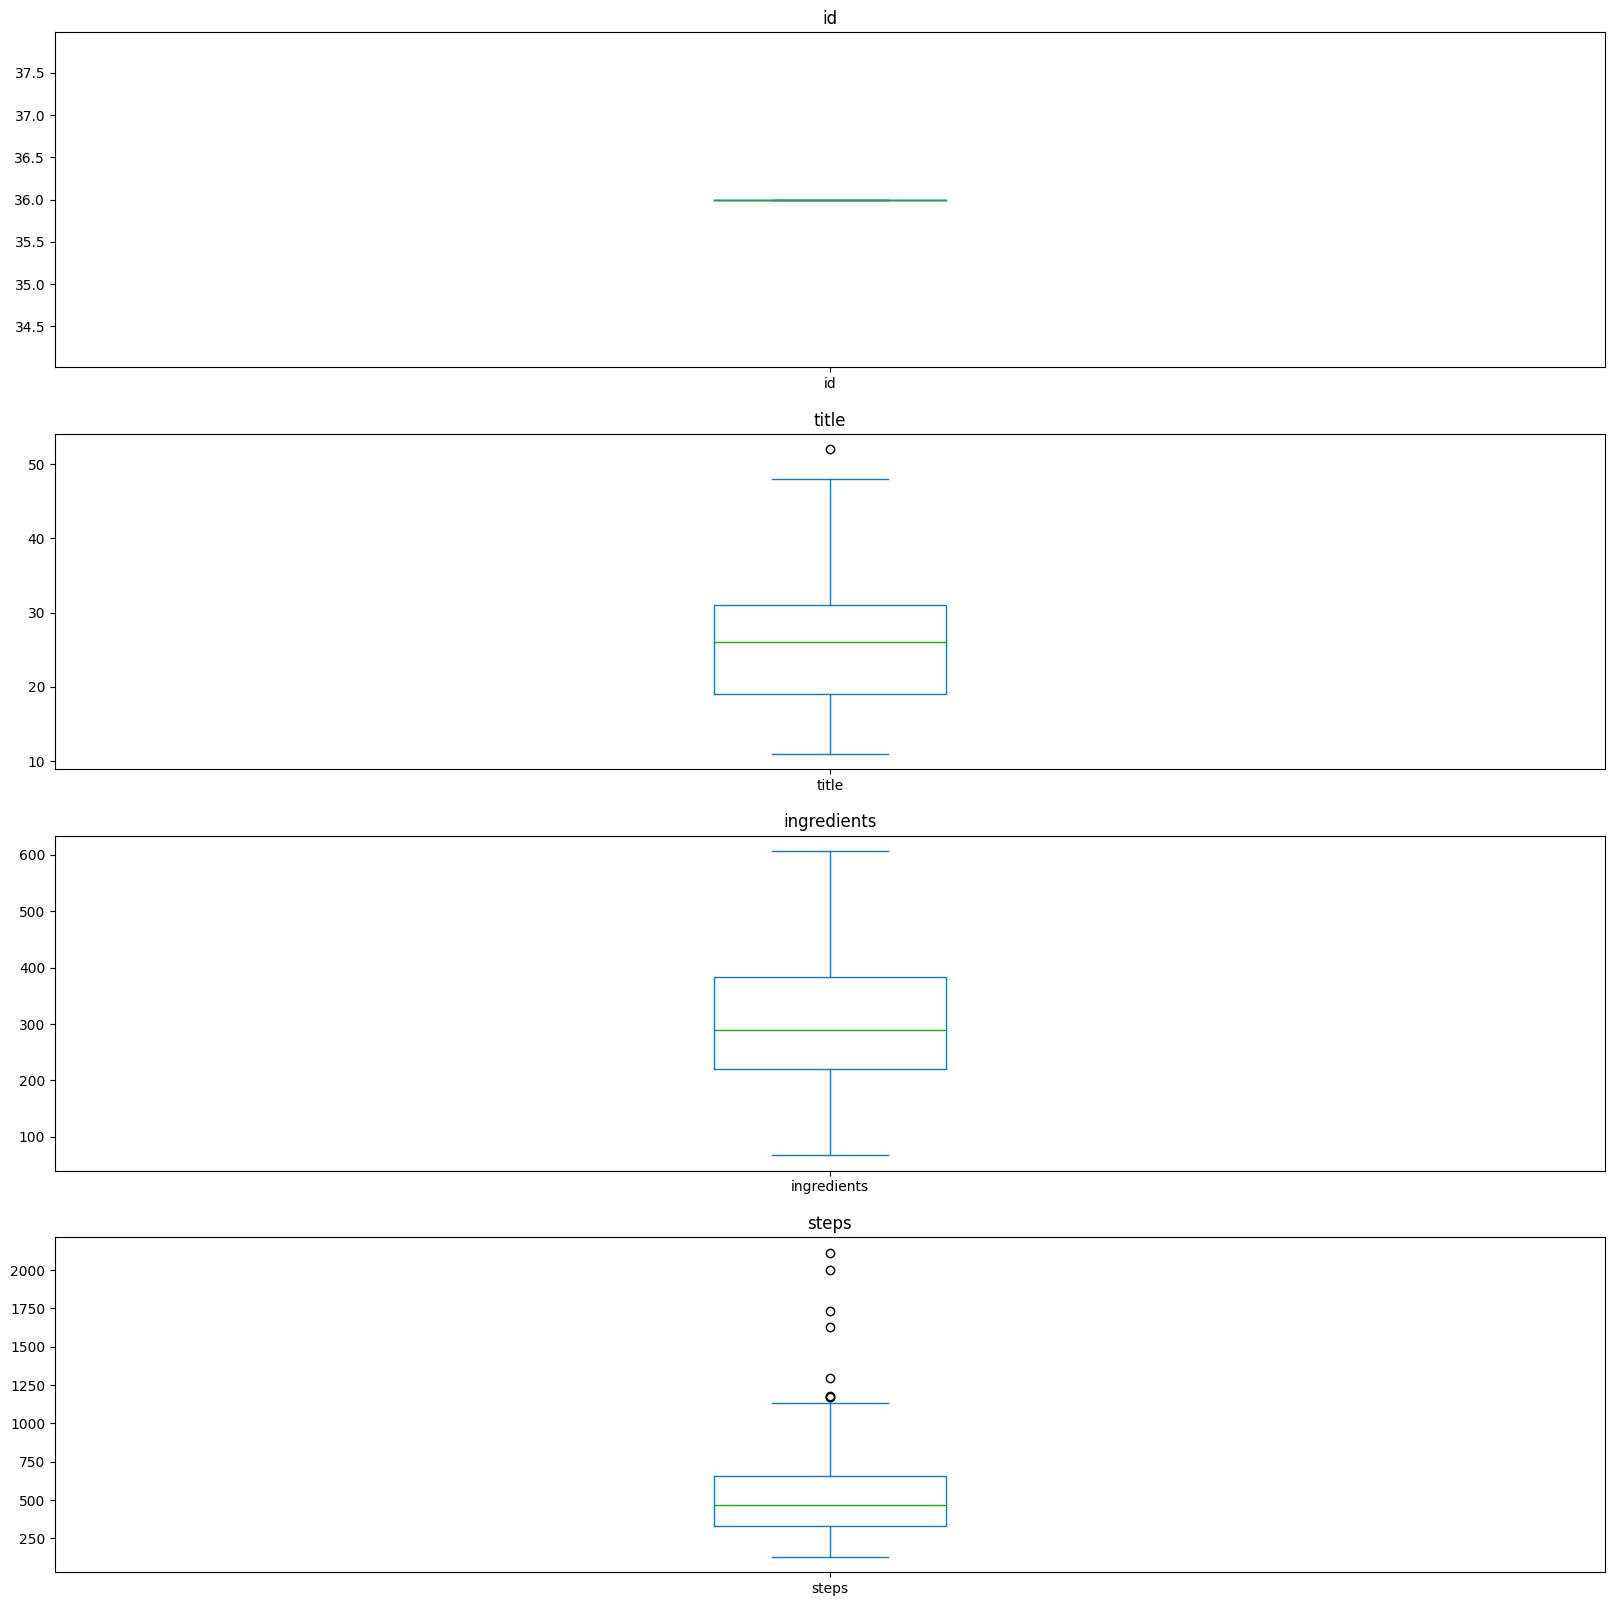

In [30]:
df_vacamsp.utils_text.plot_boxplot()

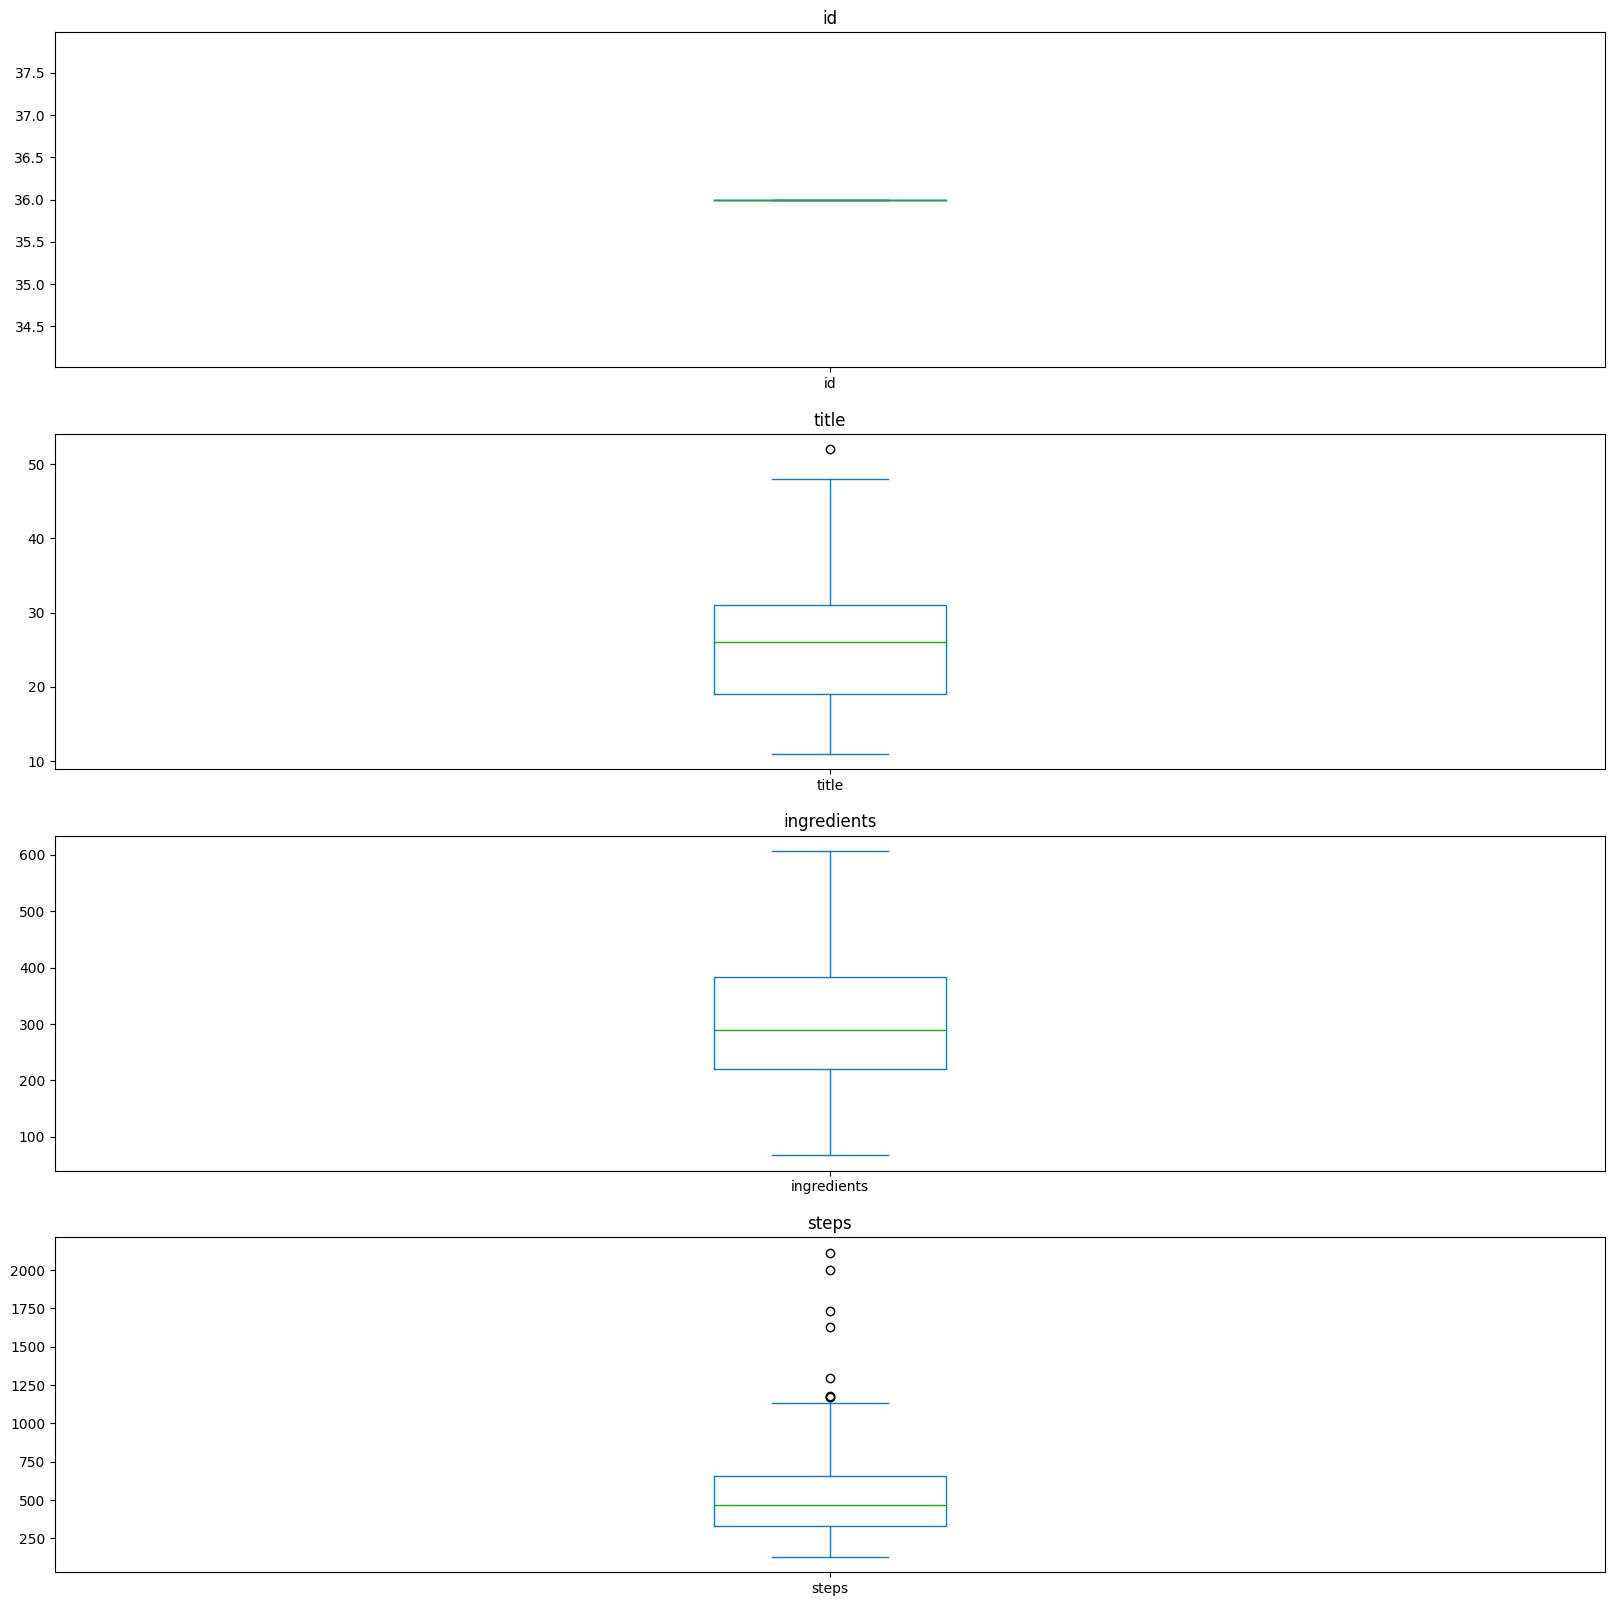

In [31]:
df_vacamsp.utils_text.plot_boxplot()

In [32]:
df_vacamsp.ingredients = df_vacamsp.ingredients.replace("\n", " ").str.replace("\t", "")
df_vacamsp.steps = df_vacamsp.steps.replace("\n", " ").str.replace("\t", "")
df_vacamsp["uuid"] = df_vacamsp.apply(lambda x: uuid.uuid4(), axis=1)

In [33]:
df_vacamsp.drop_duplicates(inplace=True, subset=["title", "ingredients", "steps"])
df_vacamsp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 266
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           217 non-null    object
 1   title        217 non-null    object
 2   ingredients  217 non-null    object
 3   steps        217 non-null    object
 4   uuid         217 non-null    object
dtypes: object(5)
memory usage: 10.2+ KB


In [34]:
abc_recetas = (datasets/"abc_recetas").glob("*.csv")
df_abc_recetas = pd.concat([pd.read_csv(i) for i in abc_recetas])

In [35]:
df_abc_recetas.info()

SyntaxError: invalid syntax (3733369876.py, line 1)

In [36]:
df_abc_recetas.drop_duplicates(subset=["url"], inplace=True)

In [37]:
df_abc_recetas.dropna(inplace=True)
df_abc_recetas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446 entries, 0 to 4836
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ingredients  4446 non-null   object
 1   step         4446 non-null   object
 2   url          4446 non-null   object
 3   title        4446 non-null   object
 4   uuid         4446 non-null   object
dtypes: object(5)
memory usage: 208.4+ KB


In [38]:
from newspaper import Article
from bs4 import BeautifulSoup
def get_name(url):
    article = Article(url)
    article.download()
    article.parse()
    soup = BeautifulSoup(article.html, "html.parser")
    try:
        title = soup.find("div", {"id": "bloque"}).find("h1").text
        return title
    except:
        print(url)
    

df_abc_recetas["title"] = df_abc_recetas.url.apply(get_name)
    

KeyboardInterrupt: 

In [46]:
df = pd.concat([df_barra, df_thermorecetas, df_vacamsp])

In [55]:
df.drop(columns=["uuid", "id"], inplace=True)
df["uuid"] = df.apply(lambda x: uuid.uuid4(), axis=1)

In [56]:
df_goutmet = pd.read_csv(datasets/"el_gourmet_chile.csv")
df = pd.concat([df, df_goutmet])

In [57]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42)
valid, test = train_test_split(test, test_size=0.5, random_state=42)

In [58]:
clean = Path().cwd().parent/"Clean"
dataset_train = pd.read_csv(clean/"train.csv")
datasets_test = pd.read_csv(clean/"test.csv")
datasets_valid = pd.read_csv(clean/"valid.csv")

In [59]:
dataset_train = pd.concat([dataset_train, train])
dataset_test = pd.concat([datasets_test, test])
dataset_valid = pd.concat([datasets_valid, valid])

In [60]:
dataset_train.to_csv(clean/"train.csv", index=False)
dataset_test.to_csv(clean/"test.csv", index=False)
dataset_valid.to_csv(clean/"valid.csv", index=False)

In [61]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25741 entries, 0 to 730
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        25741 non-null  object
 1   url          25587 non-null  object
 2   ingredients  25740 non-null  object
 3   steps        25741 non-null  object
 4   uuid         25741 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [ ]:
df.ingredients = df.ingredients.str.replace("\n", " ").str.replace("\t", " ").str.replace("\r", " ")
df.steps = df.steps.str.replace("\n", " ").str.replace("\t", " ").str.replace("\r", " ")